In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import sys
import os
import pymatgen.io.cif as cif
from tqdm import tqdm
sys.path.append(os.path.abspath(os.path.join('..')))
import src.spectra as spectra
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/tphung/Dropbox (MIT)/repos/pyspectra/analyses/mp_AgS_bispectra_lmax_4_min_dist_cutoff.csv')

Text(0, 0.5, 'Second Principal Component')

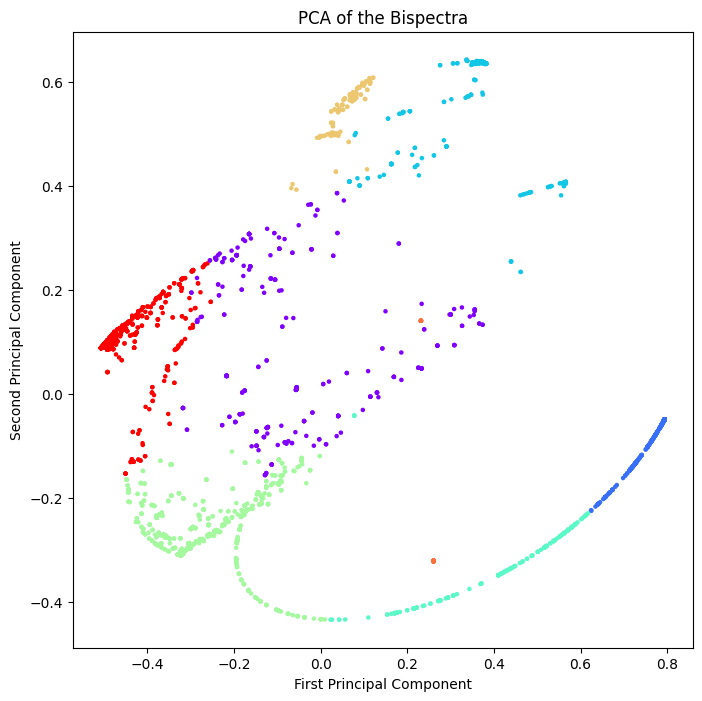

In [8]:
spectra_data = list(df.bispectrum.apply(eval))
for i in range(len(spectra_data)):
    spectra_data[i] = spectra_data[i] / np.linalg.norm(spectra_data[i])

kmeans = KMeans(n_clusters=8, n_init=10, random_state=0).fit(spectra_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spectra_data)

colors = plt.cm.get_cmap('rainbow', kmeans.n_clusters)
color_labels = [colors(label) for label in kmeans.labels_]

plt.figure(figsize=(8, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color_labels, s=5)
plt.title('PCA of the Bispectra')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

  0%|          | 0/7 [00:00<?, ?it/s]

3amino_a.cif


 29%|██▊       | 2/7 [00:02<00:04,  1.13it/s]

glu3_rtr.cif
mithrene.cif


 57%|█████▋    | 4/7 [00:02<00:01,  2.62it/s]

2amino_one_layer.cif
3methoxy_a.cif
4methoxy_b.cif


100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

2amino_rtr.cif


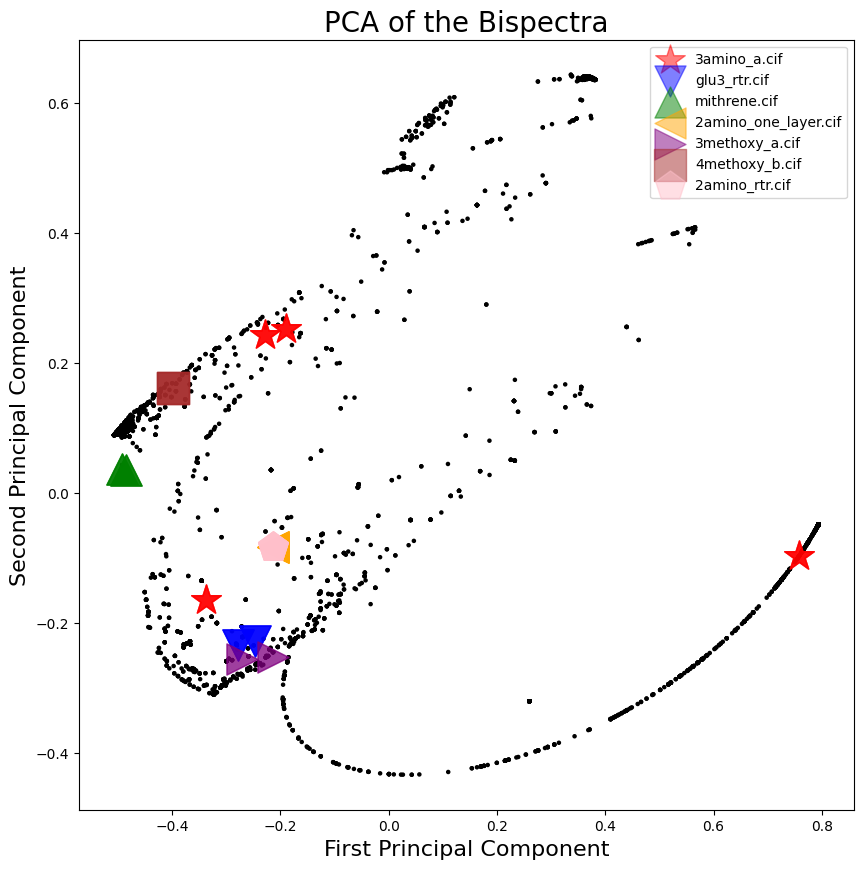

In [9]:
spectra_data = list(df.bispectrum.apply(eval))
for i in range(len(spectra_data)):
    spectra_data[i] = spectra_data[i] / np.linalg.norm(spectra_data[i])

kmeans = KMeans(n_clusters=8, n_init=10, random_state=0).fit(spectra_data)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spectra_data)

colors = ['black'] * 8
color_labels = [colors[label] for label in kmeans.labels_]


plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color_labels, s=5)
plt.title('PCA of the Bispectra', fontsize=20)
plt.xlabel('First Principal Component', fontsize=16)
plt.ylabel('Second Principal Component', fontsize=16)

bispectrum = spectra.Spectra(lmax=4, order=2, neighbors=["S", "Se", "Te"], cutoff=spectra.radial_cutoff(radius=3.1))
os.chdir('/Users/tphung/Dropbox (MIT)/repos/pyspectra/cifs/mochas/')
cif_filenames = os.listdir()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
markers = ['*', 'v', '^', '<', '>', 's', 'p', 'o']
legend_labels = set()
for i, cif_filename in enumerate(tqdm(cif_filenames)):
    print(cif_filename)
    cif_filepath = os.path.join(os.getcwd(), cif_filename)
    bispectrum.load_cif(cif_filepath)
    structure = bispectrum.get_structure()
    ag_sites = [i for i, site in enumerate(structure) if site.species_string == "Ag"]
    color = colors[i % len(colors)]
    marker = markers[i % len(markers)]
    for ag_site in ag_sites:
        bispectrum.load_cif(cif_filepath)
        spectrum = bispectrum.compute_atom_spectra(ag_site)
        if spectrum is not None:
            spectrum = spectrum / np.linalg.norm(spectrum)
            pca_result = pca.transform([spectrum])[0]
            plt.scatter(pca_result[0], pca_result[1], marker=marker, s=500, alpha=0.5, color=color)  # Increased size from 200 to 500
            if color not in legend_labels:
                plt.scatter([], [], marker=marker, s=500, alpha=0.5, label=f"{cif_filename}", color=color)  # Increased size from 200 to 500
                legend_labels.add(color)
plt.legend()  # Added this line to show the legend


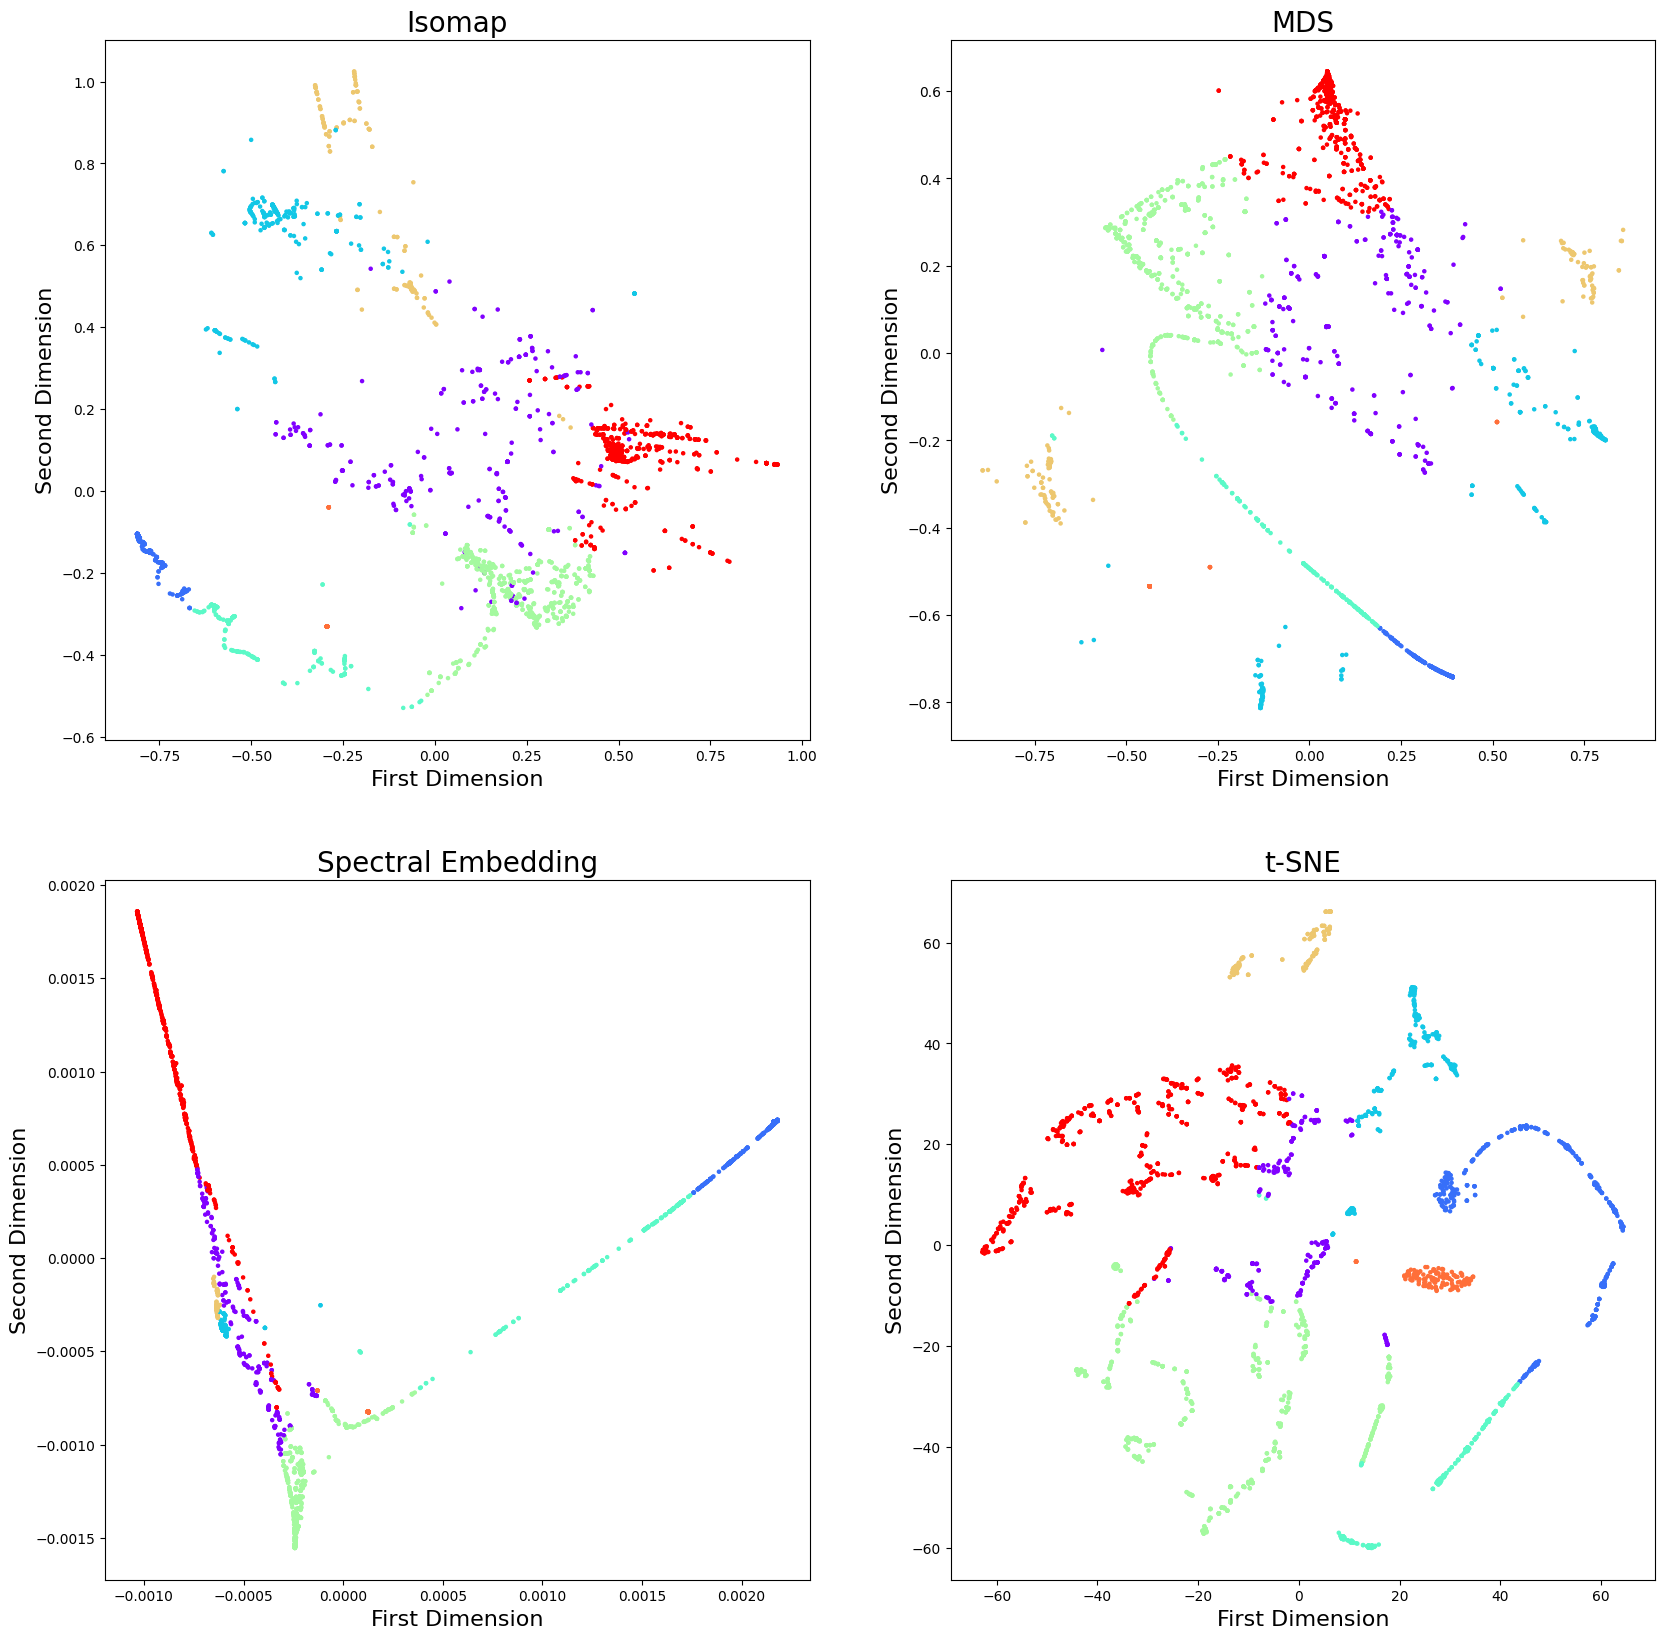

In [13]:
from sklearn import manifold

spectra_data = list(df.bispectrum.apply(eval))
for i in range(len(spectra_data)):
    spectra_data[i] = spectra_data[i] / np.linalg.norm(spectra_data[i])

spectra_data = np.array(spectra_data)  # Convert list to numpy array

kmeans = KMeans(n_clusters=8, n_init=10, random_state=0).fit(spectra_data)

methods = [manifold.Isomap(n_components=2), manifold.MDS(n_components=2), manifold.SpectralEmbedding(n_components=2), manifold.TSNE(n_components=2)]
titles = ['Isomap', 'MDS', 'Spectral Embedding', 't-SNE']

colors = plt.cm.get_cmap('rainbow', kmeans.n_clusters)
color_labels = [colors(label) for label in kmeans.labels_]

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

for ax, method, title in zip(axs.ravel(), methods, titles):
    result = method.fit_transform(spectra_data)
    ax.scatter(result[:, 0], result[:, 1], c=color_labels, s=5)
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('First Dimension', fontsize=16)
    ax.set_ylabel('Second Dimension', fontsize=16)



Estimated number of clusters: 8
Estimated number of noise points: 0


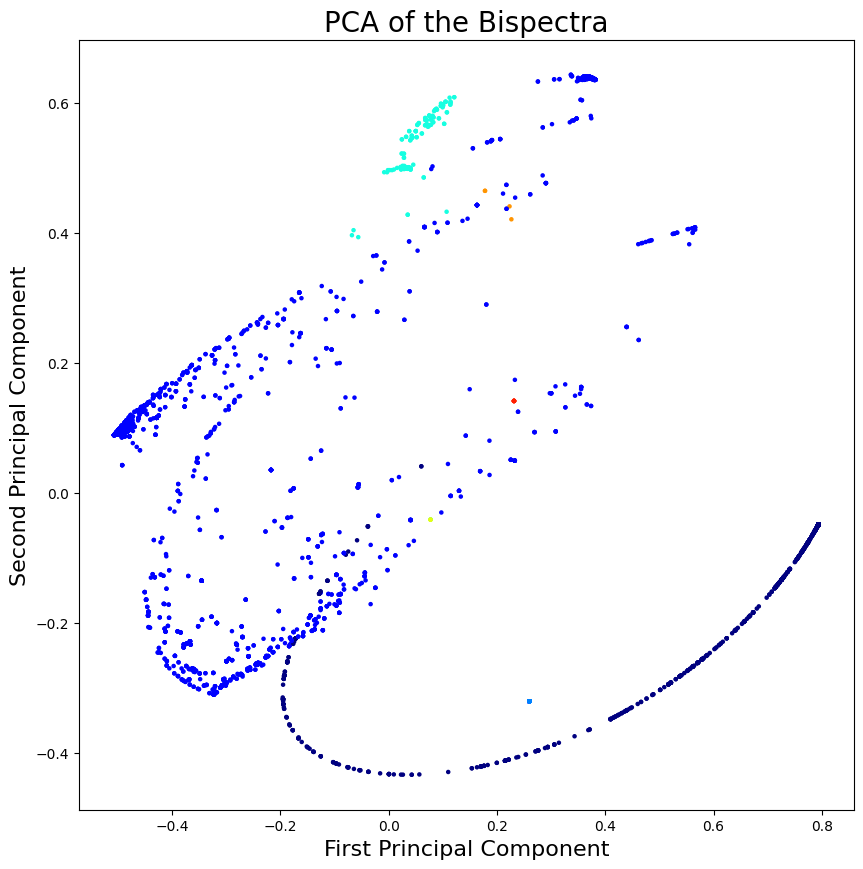

In [52]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.cm as cm

spectra_data = list(df.bispectrum.apply(eval))
for i in range(len(spectra_data)):
    spectra_data[i] = spectra_data[i] / np.linalg.norm(spectra_data[i])

pca = PCA(n_components=2)
pca_result = pca.fit_transform(spectra_data)

db = DBSCAN(eps=0.34, min_samples=1).fit(spectra_data)
labels = db.labels_

unique_labels = set(labels)
colors = [cm.jet(i/len(unique_labels)) for i in range(len(unique_labels))]
color_labels = [colors[label] if label != -1 else 'black' for label in labels]

plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color_labels, s=5)
plt.title('PCA of the Bispectra', fontsize=20)
plt.xlabel('First Principal Component', fontsize=16)
plt.ylabel('Second Principal Component', fontsize=16)

# Print the number of clusters and noise points
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

plt.show()



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(spectra_data)

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
color_labels = [colors[label] if label != -1 else 'black' for label in dbscan.labels_]

plt.figure(figsize=(10, 10))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color_labels, s=5)
plt.title('PCA of the Bispectra', fontsize=20)
plt.xlabel('First Principal Component', fontsize=16)
plt.ylabel('Second Principal Component', fontsize=16)

In [ ]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, 10)]

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.8472126105344099, 0.2612072279892349, 0.30519031141868513, 1.0),
 (0.9637831603229527, 0.47743175701653207, 0.28581314878892733, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.9977700884275279, 0.930872741253364, 0.6330642060745867, 1.0),
 (0.944252210688197, 0.9777008842752788, 0.6620530565167244, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.4530565167243369, 0.7815455594002307, 0.6462898885044214, 1.0),
 (0.21607074202229912, 0.5556324490580546, 0.7319492502883507, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

In [14]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

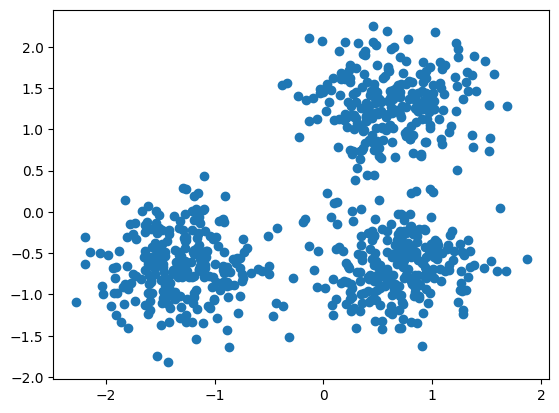

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [16]:
import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


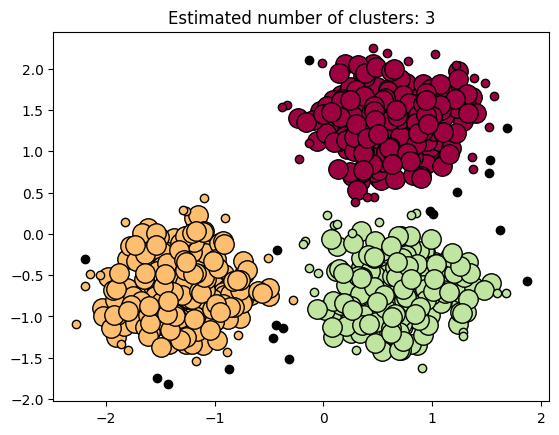

In [21]:
unique_labels = set(labels)

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()